In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

#define data type before load dataset

In [ ]:
dtype_define = {'age':	,'sex	cp':	,'trestbps':	,'chol':	,'fbs':	.'restecg':	,'thalach':	,'exang':	,'oldpeak':	,'slope':	,'ca':	,'thal':	,'target':}

#load the data set

In [140]:
df = pd.read_excel('/content/drive/MyDrive/dataset1/1645792390_cep1_dataset (1).xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [141]:
df['thal'] = df['thal'].replace({0: 3, 1: 6, 2: 7, 3: 7})  #
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,7,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,7,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,7,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,7,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,7,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,7,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,7,0


#see the data types

In [142]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#Identify the columns, data types and any initial patterns.

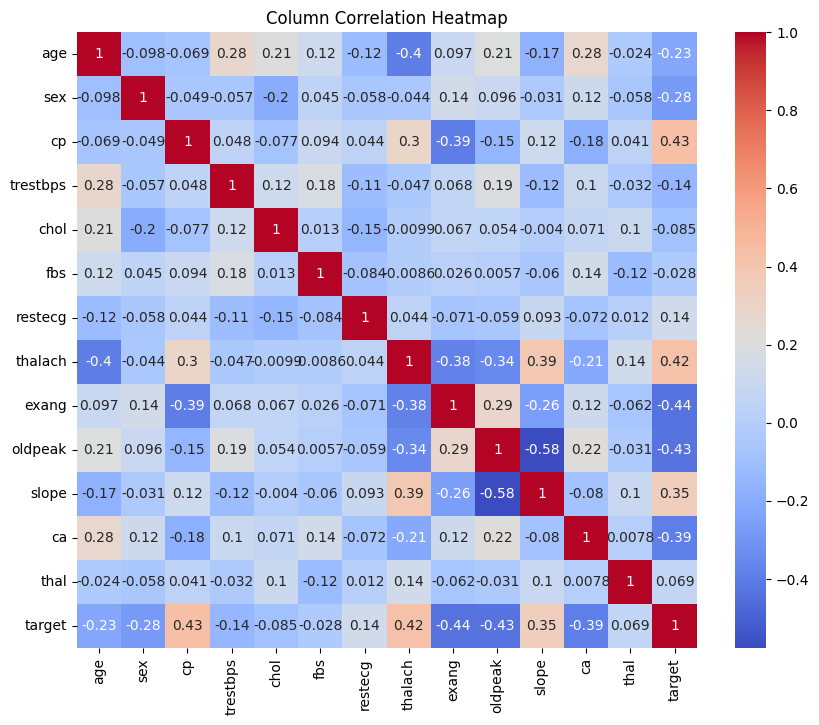

In [143]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Column Correlation Heatmap')
plt.show()

#Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [144]:
duplicates = df[df.duplicated()]
duplicates


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,7,1


In [145]:
df_new = df.drop_duplicates()
print("Number of rows before removing duplicates:", df.shape[0])
print("Number of rows after removing duplicates:", df_new.shape[0])

Number of rows before removing duplicates: 303
Number of rows after removing duplicates: 302


#no null values

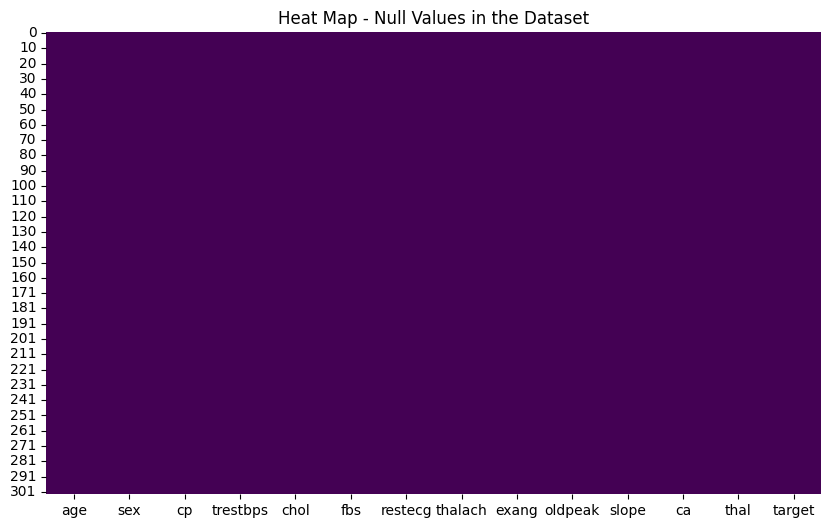

In [146]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_new.isnull(), cmap='viridis', cbar=False)
plt.title('Heat Map - Null Values ​​in the Dataset')
plt.show()

In [147]:
NA_line = df_new[df_new.isnull().any(axis=1)]
print(NA_line)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


# START STEP 2

#Get a preliminary statistical summary


#general summary

In [148]:
summary_stats = df_new.describe()
print(summary_stats)

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

# Calculate the median for numeric variables

In [149]:
median_values = df_new.median()
print(median_values)

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          7.0
target        1.0
dtype: float64


#boxplots for numeric variable

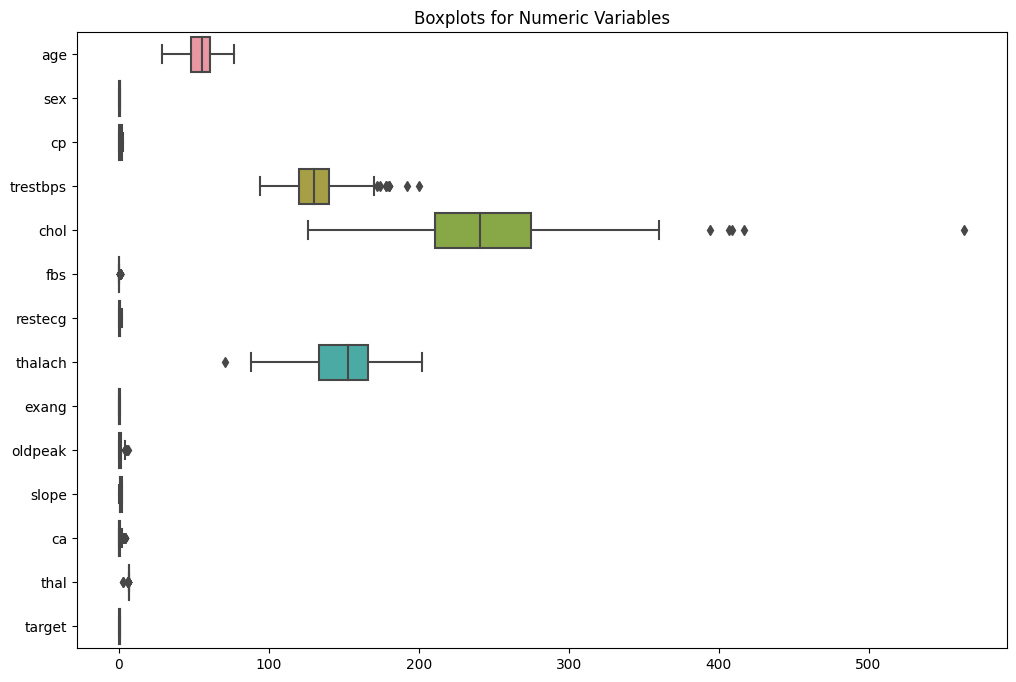

In [150]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_new.select_dtypes(include='number'), orient='h')
plt.title('Boxplots for Numeric Variables')
plt.show()

# B.Identify categorical variables

In [151]:
df_new['sex'] = df['sex'].map({1: 'Male', 0: 'Female'}).astype('object')
df_new['fbs'] = df['fbs'].map({1: 'fbs>120mg/dl', 0: 'fbs<120mg/dl'}).astype('object')
df_new['restecg'] = df['restecg'].map({0: 'Normal', 1: 'Anormal'}).astype('object')
df_new['exang'] = df['exang'].map({0: 'no', 1: 'yes'}).astype('object')
df_new['slope'] = df['slope'].map({0: 'Upward Slope', 1: 'Flat slope',2: 'Downward Slope'}).astype('object')
df_new['ca'] = df['ca'].astype('object')
df_new['thal'] = df['thal'].map({3: 'normal', 6: 'fixed defect',7: 'reversible defect'}).astype('object')
df_new['target'] = df['target'].astype('object')

<ipython-input-151-9bf88a587c0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sex'] = df['sex'].map({1: 'Male', 0: 'Female'}).astype('object')
<ipython-input-151-9bf88a587c0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['fbs'] = df['fbs'].map({1: 'fbs>120mg/dl', 0: 'fbs<120mg/dl'}).astype('object')
<ipython-input-151-9bf88a587c0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [152]:
df_new.dtypes

age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

# visual plot for undertanding categorical varibles

In [153]:
categorical_variables = df_new.select_dtypes(include='object').columns.tolist()

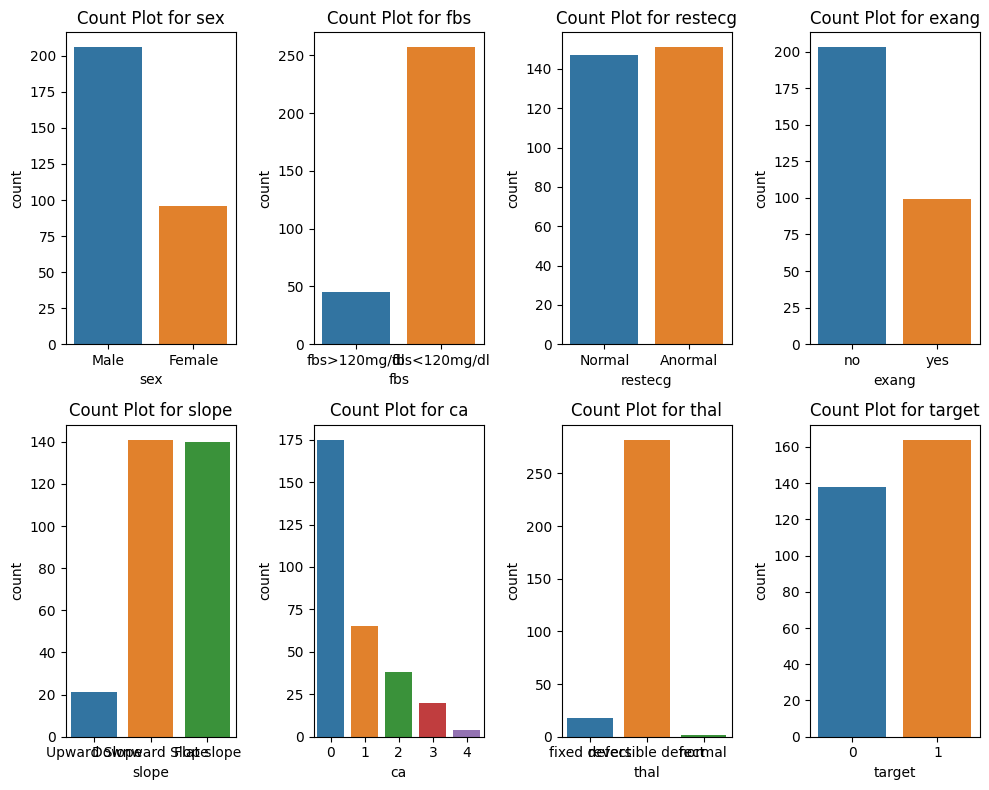

In [154]:
num_categories = len(categorical_variables)
num_rows = min(2, num_categories)
num_cols = -(-num_categories // num_rows)
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 8))
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j  # Calculates the index for the current variable
        if index < num_categories:  # Checks if there are still variables to plot
            sns.countplot(x=categorical_variables[index], data=df_new, ax=axs[i, j])
            axs[i, j].set_title(f'Count Plot for {categorical_variables[index]}')
plt.tight_layout()
plt.show()

#'##########################################################'
#step B.ok
#'##########################################################'


#C.	Study the occurrence of CVD across the Age category

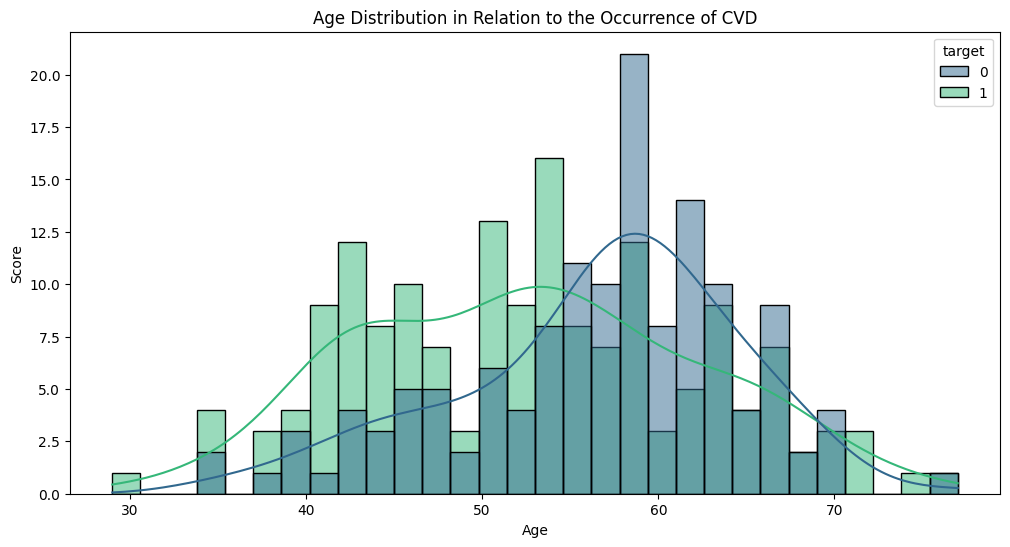

In [155]:
plt.figure(figsize=(12, 6))
sns.histplot(x='age', hue='target', data=df_new, bins=30, kde=True, palette='viridis')
plt.title('Age Distribution in Relation to the Occurrence of CVD')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()

#'#########################################################'

# Step C. OK

#'#########################################################'

#d.	Study the composition of all patients with respect to the Sex category

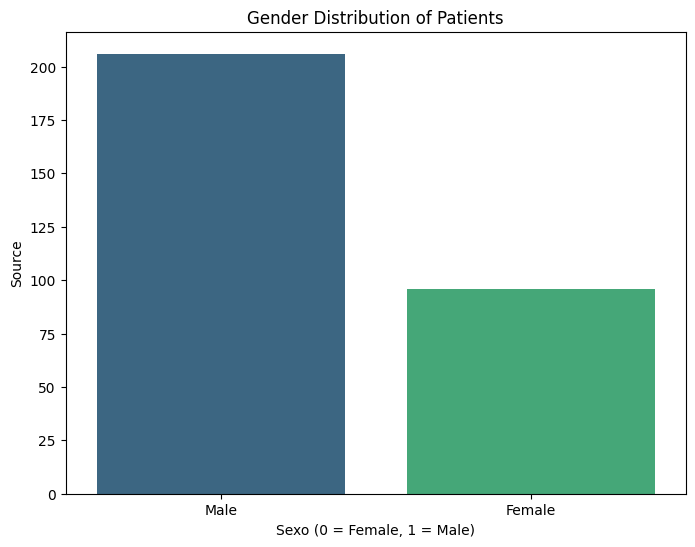

In [156]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df_new, palette='viridis')
plt.title('Gender Distribution of Patients')
plt.xlabel('Sexo (0 = Female, 1 = Male)')
plt.ylabel('Source')
plt.show()

Conclusion:

Based on the data sample analyzed, we observed a predominance of male patients compared to female patients.

#'#########################################################'

# Step d. OK

#'#########################################################'

#e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

To study whether you can detect heart attacks based on abnormalities in a patient's resting blood pressure (trestbps), you can create comparative visualizations and analyses. Let's start with a boxplot to compare the distribution of resting blood pressure between groups of patients with and without heart attacks:

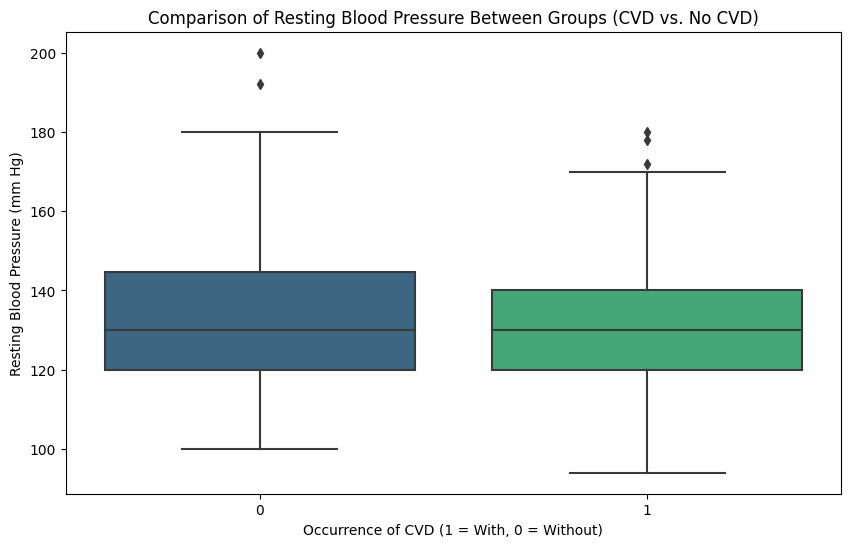

In [157]:
# Boxplot to compare resting blood pressure distribution between groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=df_new, palette='viridis')
plt.title('Comparison of Resting Blood Pressure Between Groups (CVD vs. No CVD)')
plt.xlabel('Occurrence of CVD (1 = With, 0 = Without)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

In [158]:
# dataset into two groups: with CVD and without CVD
with_cvd = df_new[df_new['target'] == 1]['trestbps']
without_cvd = df_new[df_new['target'] == 0]['trestbps']

In [159]:
#  t test to compare means
t_stat, p_value = ttest_ind(with_cvd, without_cvd)

print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

Test Statistic: -2.5609912831268065
P-value: 0.010926538861949147


Conclusion:
Based on the Student's t-test results, there is statistical evidence to suggest that there is a significant difference in resting blood pressure means between groups with and without cardiovascular disease. Average resting blood pressure can be an important factor in detecting heart attacks as there is a statistically significant difference between groups.

#'#########################################################'

# Step e. OK

#'#########################################################'

# f.	Describe the relationship between cholesterol levels and a target variable

To describe the relationship between cholesterol levels and the target variable (Target), we can start by visualizing the distribution of cholesterol levels in relation to the occurrence or not of cardiovascular disease (CVD) with a boxplot.

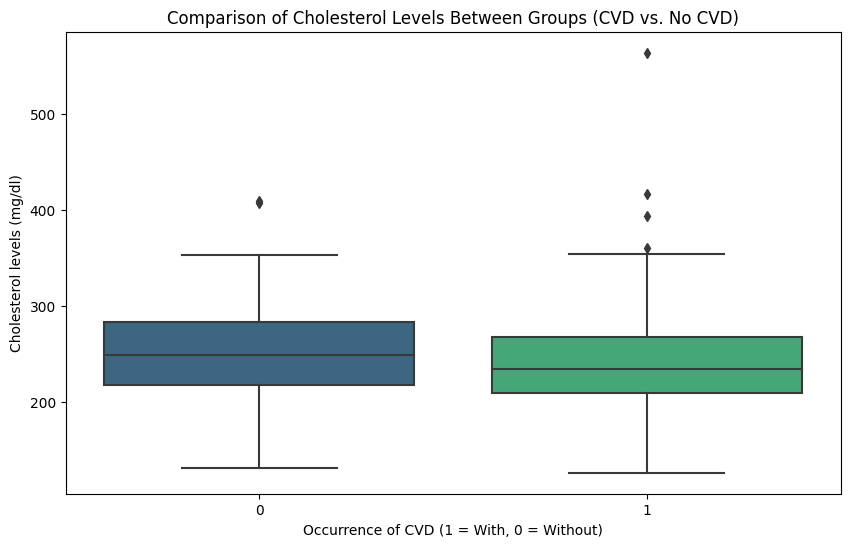

In [160]:
# Boxplot to compare cholesterol distribution between groups with and without CVD
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df_new, palette='viridis')
plt.title('Comparison of Cholesterol Levels Between Groups (CVD vs. No CVD)')
plt.xlabel('Occurrence of CVD (1 = With, 0 = Without)')
plt.ylabel('Cholesterol levels (mg/dl)')
plt.show()

In [161]:
# Test the Mann-Whitney U
u_statistic, p_value = mannwhitneyu(with_cvd, without_cvd)

In [162]:
print(f'Mann-Whitney U Statistic: {u_statistic}')
print(f'P-value: {p_value}')

Mann-Whitney U Statistic: 9701.0
P-value: 0.03222615575138192


In [163]:
if p_value < 0.05:
    print('We can conclude there is a significant difference in cholesterol levels between groups with and without cardiovascular disease.')
else:
    print('We can conclude there is not enough evidence to state a significant difference in cholesterol levels between the groups.')

We can conclude there is a significant difference in cholesterol levels between groups with and without cardiovascular disease.


#'#########################################################'

# Step f. OK

#'#########################################################'

# G.	State what relationship exists between peak exercising and the occurrence of a heart attack

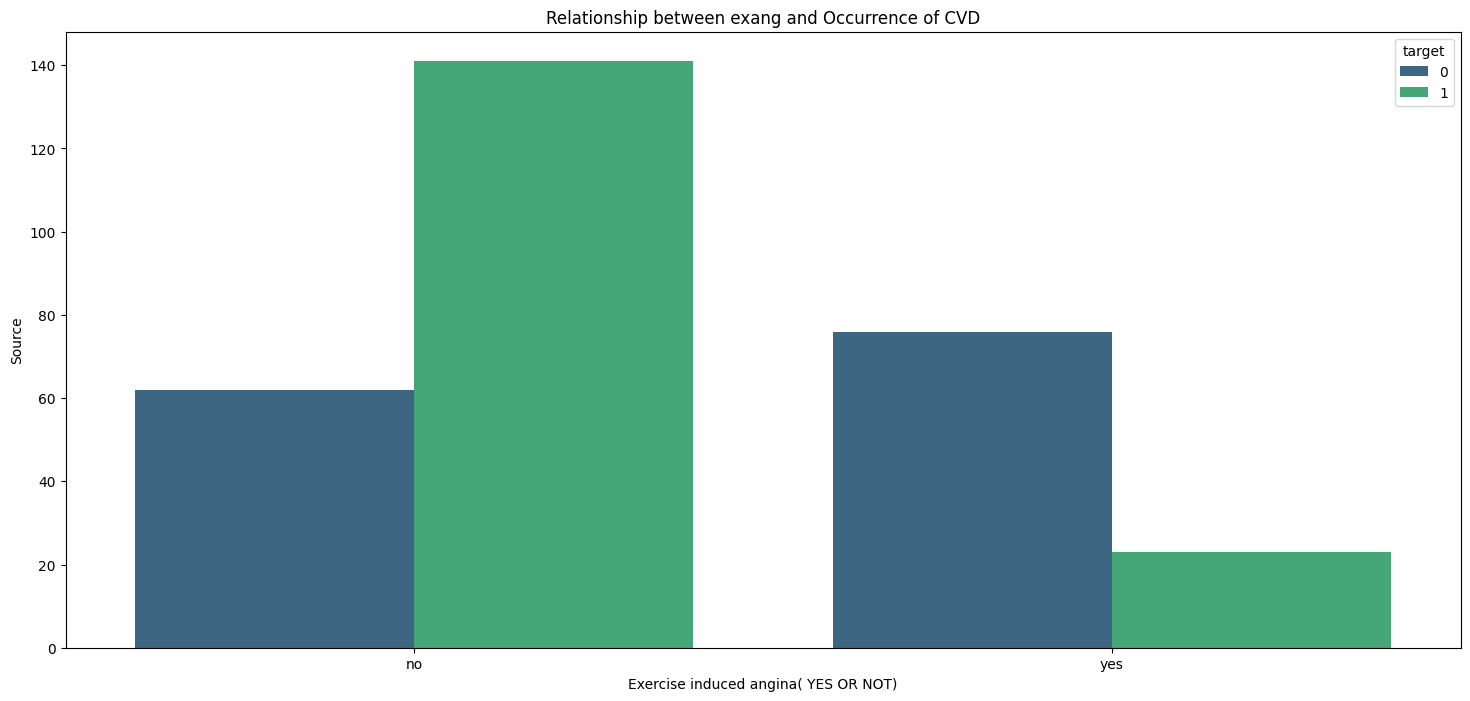

In [164]:
# Count plot to compare the distribution of peak exercising between groups with and without CVD
plt.figure(figsize=(18, 8))
sns.countplot(x='exang', hue='target', data=df_new, palette='viridis')
plt.title('Relationship between exang and Occurrence of CVD')
plt.xlabel('Exercise induced angina( YES OR NOT)')
plt.ylabel('Source')
plt.show()

In [165]:
# Calculate the proportion of CVD occurrence for each peak exercising category
prop_by_peak_exang = df_new.groupby('exang')['target'].mean()

In [166]:
print("Proportion of CVD Occurrence for each Peak Exercising category:")
print(prop_by_peak_exang)

Proportion of CVD Occurrence for each Peak Exercising category:
exang
no     0.694581
yes    0.232323
Name: target, dtype: float64


In [167]:
contingency_table = pd.crosstab(df_new['exang'], df_new['target'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print("\nResult Chi-Square Test :")
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")


Result Chi-Square Test :
Chi2 Stat: 55.45620298199192
P-value: 9.556466486179178e-14


results confirm that there is significant statistical evidence to reject the null hypothesis of independence between the variable 'exang' and the occurrence of cardiovascular disease (CVD). The extremely low p-value suggests a highly significant association between the 'exang' category and the presence of CVD.

Conclusion:

Based on t chi-square test result, we reinforce the conclusion that the 'exang' variable is strongly associated with the occurrence of cardiovascular disease in the data set.

#'#########################################################'

# Step G. OK

#'#########################################################'

# H.	Check if thalassemia is a major cause of CVD

To verify whether thalassemia is a significant cause of cardiovascular disease (CVD), we can perform exploratory and statistical analyzes on the relationship between the variable thal (thalassemia) and the occurrence of CVD.

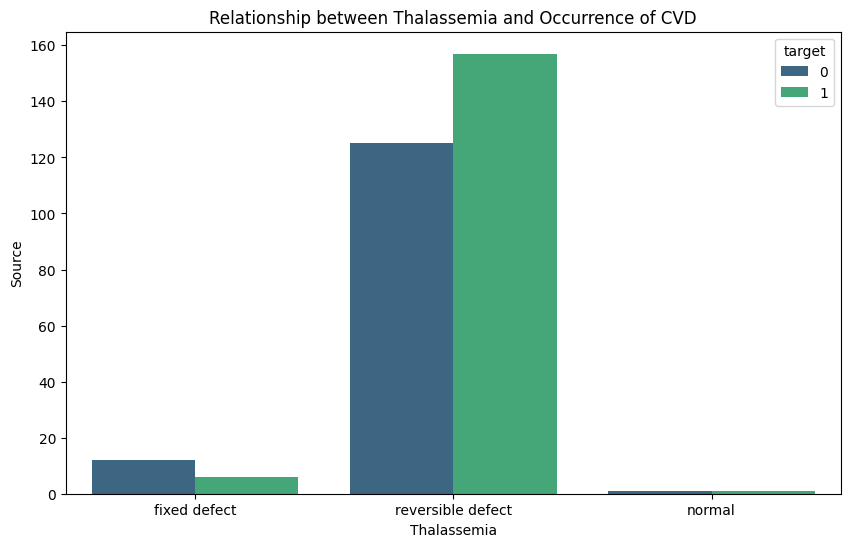

In [168]:
# Count plot to compare thalassemia distribution between groups with and without CVD
plt.figure(figsize=(10, 6))
sns.countplot(x='thal', hue='target', data=df_new, palette='viridis')
plt.title('Relationship between Thalassemia and Occurrence of CVD')
plt.xlabel('Thalassemia')
plt.ylabel('Source')
plt.show()

perform a statistical test, such as the chi-square test, to check whether there is a significant association:

In [169]:
# Chi-square test to verify the association
contingency_table_thal = pd.crosstab(df_new['thal'], df_new['target'])
chi2_stat_thal, p_value_thal, _, _ = chi2_contingency(contingency_table_thal)

print("nChi-Square Test Result for Thalassemia:")
print(f"Chi2 Stat: {chi2_stat_thal}")
print(f"P-value: {p_value_thal}")

nChi-Square Test Result for Thalassemia:
Chi2 Stat: 3.418130106370443
P-value: 0.1810349715881783


Conclusion:

Based on these results, we cannot conclude that thalassemia is a significant cause of cardiovascular disease in this specific data set. The higher p-value suggests that there is no statistically significant association between thalassemia categories and the occurrence of CV

#'#########################################################'

# Step H. OK

#'#########################################################'

#I.	List how the other factors determine the occurrence of CVD

#j.	Use a pair plot to understand the relationship between all the given variables

Chest pain type VS CVD Occurrence

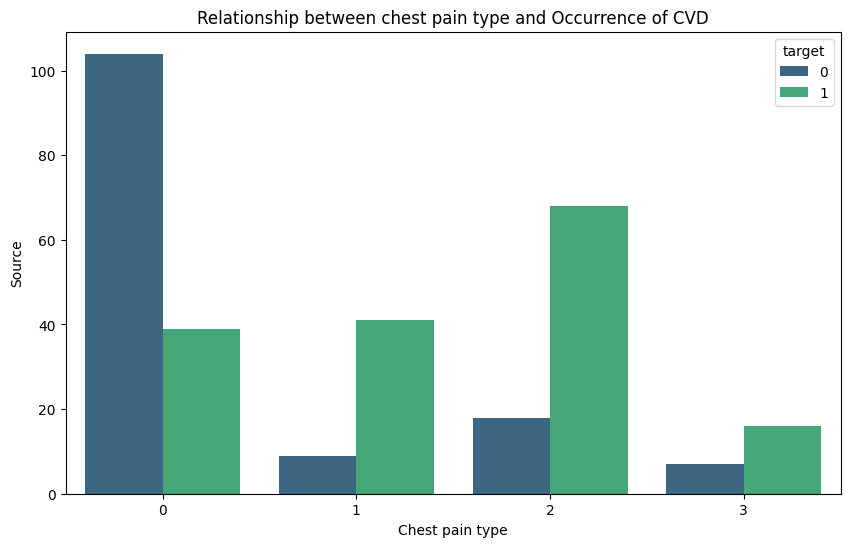

In [170]:
# Count plot to compare chest pain type distribution between groups with and without CVD
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df_new, palette='viridis')
plt.title('Relationship between chest pain type and Occurrence of CVD')
plt.xlabel('Chest pain type')
plt.ylabel('Source')
plt.show()

Fasting blood sugar  VS CVD Occurrence

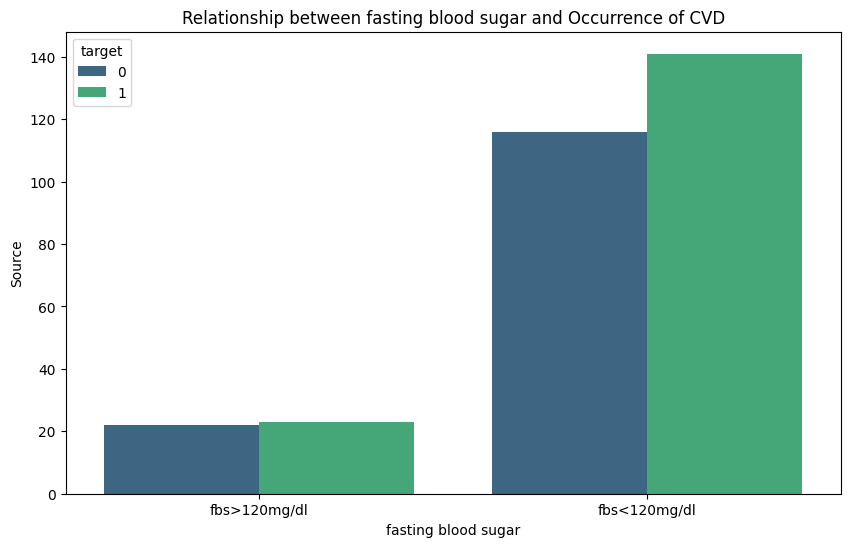

In [171]:
# Count plot to compare fasting blood sugar distribution between groups with and without CVD
plt.figure(figsize=(10, 6))
sns.countplot(x='fbs', hue='target', data=df_new, palette='viridis')
plt.title('Relationship between fasting blood sugar and Occurrence of CVD')
plt.xlabel('fasting blood sugar')
plt.ylabel('Source')
plt.show()

Resting electrocardiographic results VS CVD Occurrence

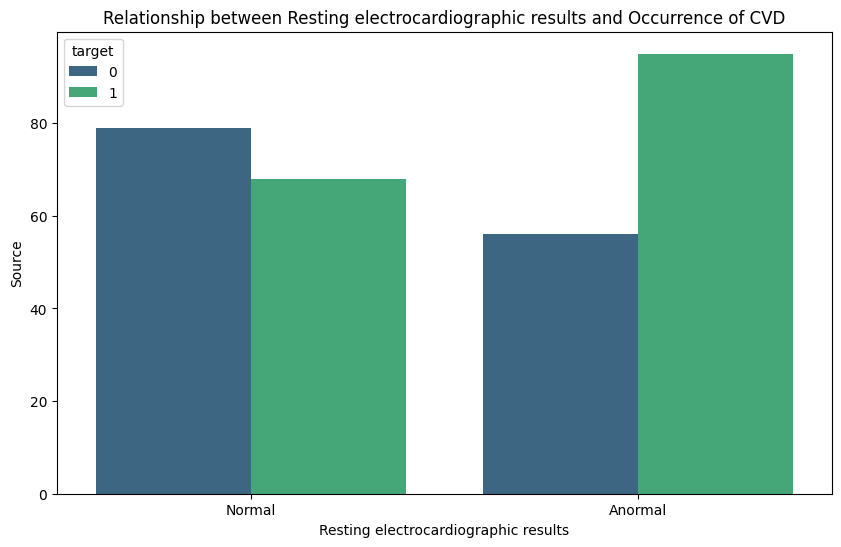

In [172]:
# Count plot to compare Resting electrocardiographic results distribution between groups with and without CVD
plt.figure(figsize=(10, 6))
sns.countplot(x='restecg', hue='target', data=df_new, palette='viridis')
plt.title('Relationship between Resting electrocardiographic results and Occurrence of CVD')
plt.xlabel('Resting electrocardiographic results')
plt.ylabel('Source')
plt.show()

ST depression induced by exercise relative to rest VS CVD Occurrence

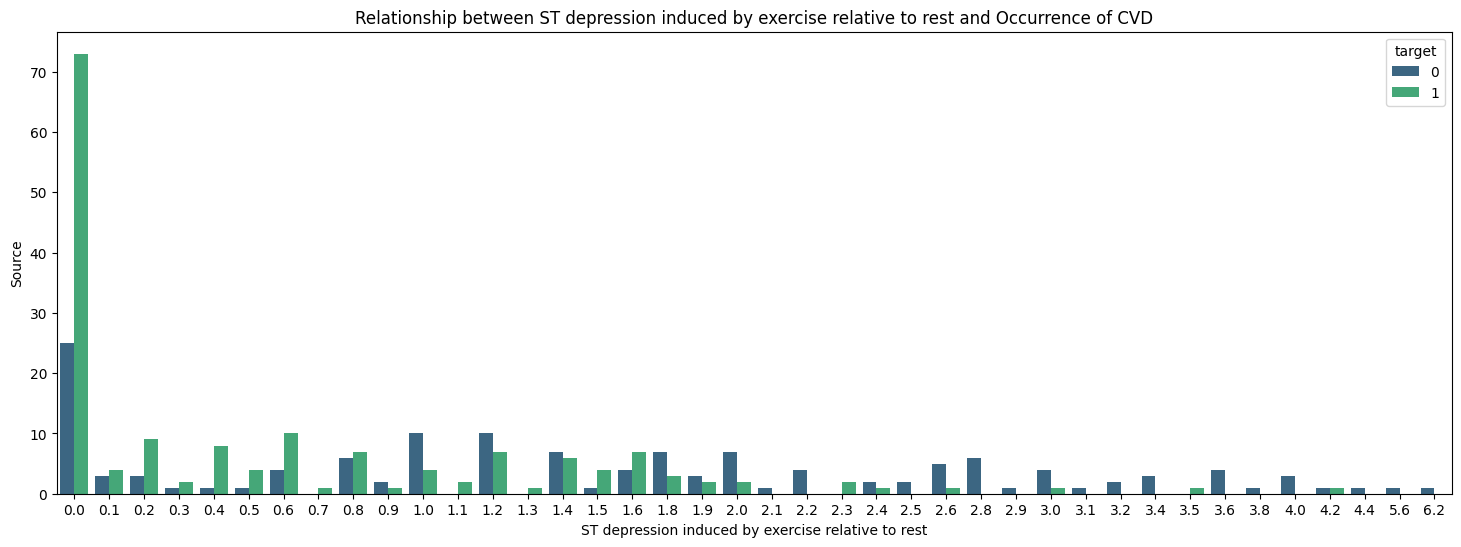

In [173]:
# Count plot to compare ST depression induced by exercise relative to restdistribution between groups with and without CVD
plt.figure(figsize=(18, 6))
sns.countplot(x='oldpeak', hue='target', data=df_new, palette='viridis')
plt.title('Relationship between ST depression induced by exercise relative to rest and Occurrence of CVD')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Source')
plt.show()

Slope of the peak exercise ST segment  VS CVD Occurrence


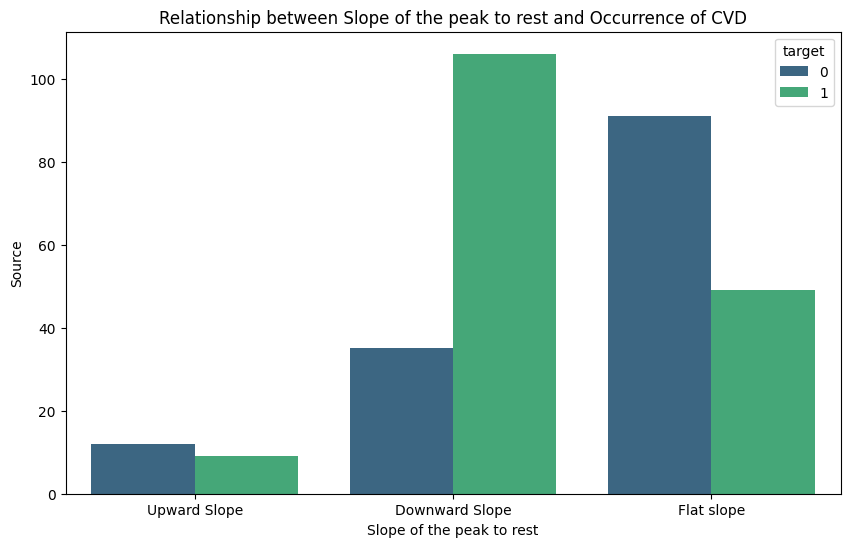

In [174]:
# Count plot to compare Slope of the peak to restdistribution between groups with and without CVD
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', hue='target', data=df_new, palette='viridis')
plt.title('Relationship between Slope of the peak to rest and Occurrence of CVD')
plt.xlabel('Slope of the peak to rest')
plt.ylabel('Source')
plt.show()

Conclusion:
always interesting data in almost all variables, we cannot fail to check them

In [175]:
selected_variables = ['cp', 'fbs', 'oldpeak', 'restecg', 'slope']
selected_variables_with_target = selected_variables + ['target']

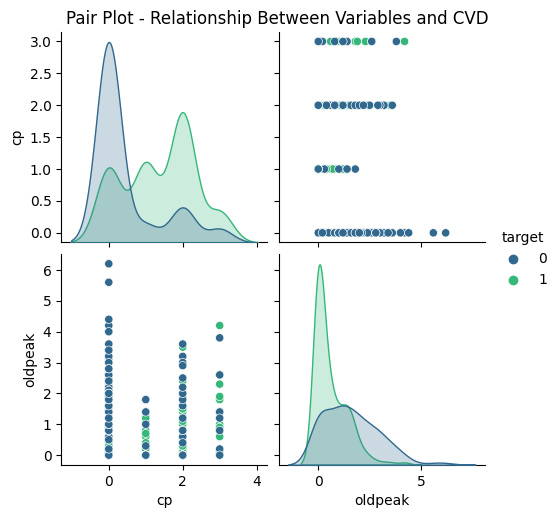

In [176]:
sns.pairplot(df_new[selected_variables_with_target], hue='target', palette='viridis')
plt.suptitle('Pair Plot - Relationship Between Variables and CVD', y=1.02)
plt.show()

#'#########################################################'

# Step I. OK
# Step J. OK

#'#########################################################'

#3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

To build a baseline model to predict the risk of a heart attack, let's start with logistic regression and random forest models. Additionally, we will explore correlation analysis and logistic regression (using standard errors and p-values) for feature selection.

In [177]:
#1. Split the dataset into training and testing:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg','fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['target'], test_size=0.2, random_state=42)

In [189]:
#2. Logistic Regression Model:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
# Predict on Test Set
y_pred_logreg = logreg_model.predict(X_test)
# Assess accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy of the Logistic Regression model: {accuracy_logreg:.4f}\n')
# View the ranking report
print('Ranking Report:\n', classification_report(y_test, y_pred_logreg))

Accuracy of the Logistic Regression model: 0.8361

Ranking Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [192]:
# 3. Random Forest Model:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Predict on test set
y_pred_rf = rf_model.predict(X_test)
# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of the Random Forest model: {accuracy_rf:.4f}\n')
# Exibir o relatório de classificação
print('Ranking Report:\n', classification_report(y_test, y_pred_rf))

Accuracy of the Random Forest model: 0.8525

Ranking Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [184]:
#4. Logistic Regression for Feature Selection:
# Add intercept to training set
X_train_with_intercept = sm.add_constant(X_train)
# Initialize and train the Logistic Regression model using statsmodels
logreg_model_stats = sm.Logit(y_train, X_train_with_intercept)
result = logreg_model_stats.fit()
# Display statistical summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.364047
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           13
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.4710
Time:                        06:11:32   Log-Likelihood:                -88.099
converged:                       True   LL-Null:                       -166.55
Covariance Type:            nonrobust   LLR p-value:                 8.351e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3398      6.704      1.244      0.214      -4.800      21.480
age           -0.0121      0.

#General Conclusions:

Variables with significantly low p-values ​​(p < 0.05), such as sex, cp (type of chest pain), exang (exercise-induced angina), oldpeak (exercise-induced ST segment depression), slope (ST segment slope) during peak exercise), ca (number of vessels stained by fluoroscopy), are statistically significant in predicting the occurrence of CVD.

Variables with higher p-values ​​such as age (age), trestbps (resting blood pressure), chol (cholesterol), fbs (fasting blood sugar), restecg (electrocardiogram results), thalach (maximum heart rate achieved), and thal (thalassemia), may not be statistically significant in the prediction.

The exact interpretation of coefficients depends on the specific scale and nature of each variable.

#'##################################################'

#project completed thank you very much

autor: YAN NSIHIYAMA
Data: 15/11/2023
Title: SimpliLearn ML health project

#'##################################################'
